In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# 下载思源黑体字体文件
url = "https://github.com/adobe-fonts/source-han-sans/raw/release/OTF/SC/SourceHanSansSC-Regular.otf"
response = requests.get(url)
font_path = BytesIO(response.content)

# 读取 CSV 文件
file_path = 'extracted_news.csv'

try:
    # 使用 pandas 读取 CSV 文件
    df = pd.read_csv(file_path)

    # 假设文本内容在 'content' 列中，提取所有文本
    text = ' '.join(df['content'].dropna().astype(str).tolist())

    # 生成词云图
    wordcloud = WordCloud(
        width=800, 
        height=400,
        background_color='white',
        font_path=font_path  # 使用下载的字体
    ).generate(text)

    # 显示词云图
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

except pd.errors.ParserError as e:
    print(f"ParserError: {e}")
except Exception as e:
    print(f"Error: {e}")


Error: unknown file format


In [3]:
import matplotlib.font_manager as fm

# 列出所有字体
font_paths = fm.findSystemFonts()
chinese_fonts = [font for font in font_paths if 'chinese' in font.lower() or 'song' in font.lower() or 'hei' in font.lower()]

print("可用的中文字体有：")
for font in chinese_fonts:
    print(font)


可用的中文字体有：
C:\Windows\Fonts\simhei.ttf
C:\Windows\Fonts\STXIHEI.TTF
C:\Windows\Fonts\AdobeSongStd-Light.otf
C:\Windows\Fonts\HYZhongHeiTi-197.ttf
C:\Windows\Fonts\STSONG.TTF
C:\Windows\Fonts\AdobeHeitiStd-Regular.otf


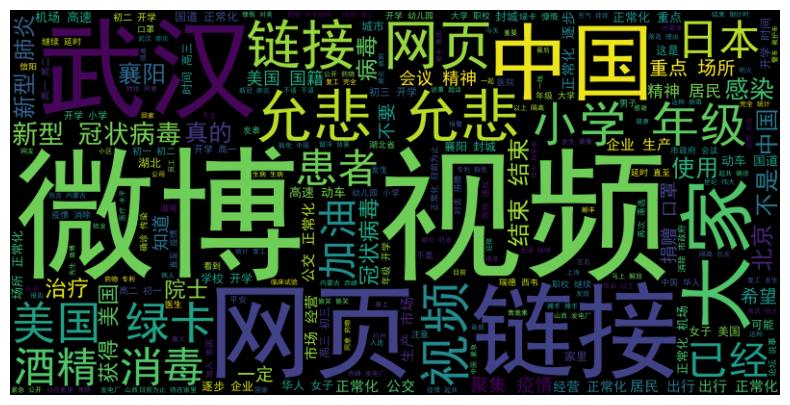

In [10]:
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# 加载数据
data = pd.read_csv('weibo_data.csv')

# 提取文本内容并过滤非中文字符
def chinese_word_segmentation(text):
    # 加载停用词表
    stop_words = set()
    with open('hit_stopwords.txt', 'r', encoding='utf-8') as f:
        for line in f:
            stop_words.add(line.strip())

    # 使用jieba分词，并过滤停用词和非中文字符
    words = jieba.cut(text)
    words_filtered = []
    for word in words:
        word = re.sub('[^\u4e00-\u9fa5]', '', word)  # 只保留中文字符
        if word and word not in stop_words and len(word) > 1:  # 过滤停用词和长度为1的词语
            words_filtered.append(word)
    return ' '.join(words_filtered)

# 提取并过滤文本内容
text = ' '.join(data['rumorText'].dropna().astype(str).tolist())
filtered_text = chinese_word_segmentation(text)

# 生成词云
wordcloud = WordCloud(font_path='C:\Windows\Fonts\simhei.ttf', width=800, height=400).generate(filtered_text)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


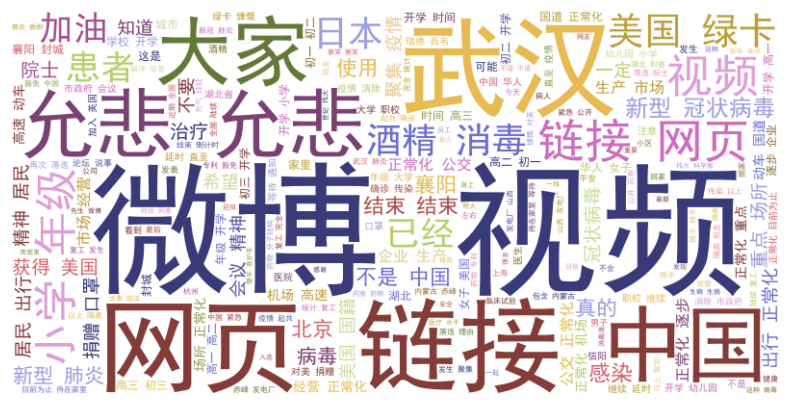

In [11]:
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# 加载数据
data = pd.read_csv('weibo_data.csv')

# 提取文本内容并过滤非中文字符
def chinese_word_segmentation(text):
    # 加载停用词表
    stop_words = set()
    with open('hit_stopwords.txt', 'r', encoding='utf-8') as f:
        for line in f:
            stop_words.add(line.strip())

    # 使用jieba分词，并过滤停用词和非中文字符
    words = jieba.cut(text)
    words_filtered = []
    for word in words:
        word = re.sub('[^\u4e00-\u9fa5]', '', word)  # 只保留中文字符
        if word and word not in stop_words and len(word) > 1:  # 过滤停用词和长度为1的词语
            words_filtered.append(word)
    return ' '.join(words_filtered)

# 提取并过滤文本内容
text = ' '.join(data['rumorText'].dropna().astype(str).tolist())
filtered_text = chinese_word_segmentation(text)

# 生成词云
wordcloud = WordCloud(font_path='C:\Windows\Fonts\simhei.ttf', width=800, height=400, 
                      background_color='white', colormap='tab20b', max_words=200, 
                      contour_color='steelblue', contour_width=2).generate(filtered_text)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


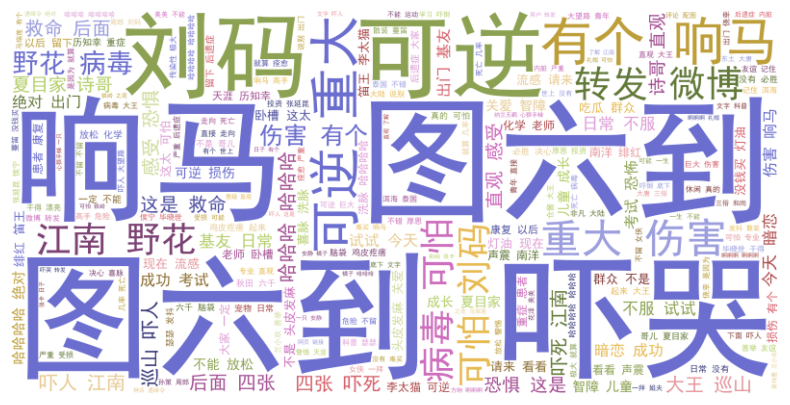

In [15]:
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# 加载数据
data = pd.read_csv(r'D:\桌面\新冠肺炎分析\forward_comment_data.csv')

# 提取文本内容并过滤非中文字符
def chinese_word_segmentation(text):
    # 加载停用词表
    stop_words = set()
    with open('hit_stopwords.txt', 'r', encoding='utf-8') as f:
        for line in f:
            stop_words.add(line.strip())

    # 使用jieba分词，并过滤停用词和非中文字符
    words = jieba.cut(text)
    words_filtered = []
    for word in words:
        word = re.sub('[^\u4e00-\u9fa5]', '', word)  # 只保留中文字符
        if word and word not in stop_words and len(word) > 1:  # 过滤停用词和长度为1的词语
            words_filtered.append(word)
    return ' '.join(words_filtered)

# 提取并过滤文本内容
text = ' '.join(data['text'].dropna().astype(str).tolist())
filtered_text = chinese_word_segmentation(text)

# 生成词云
wordcloud = WordCloud(font_path='C:\Windows\Fonts\simhei.ttf', width=800, height=400, 
                      background_color='white', colormap='tab20b', max_words=200, 
                      contour_color='steelblue', contour_width=2).generate(filtered_text)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


c:\Users\86132\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\86132\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


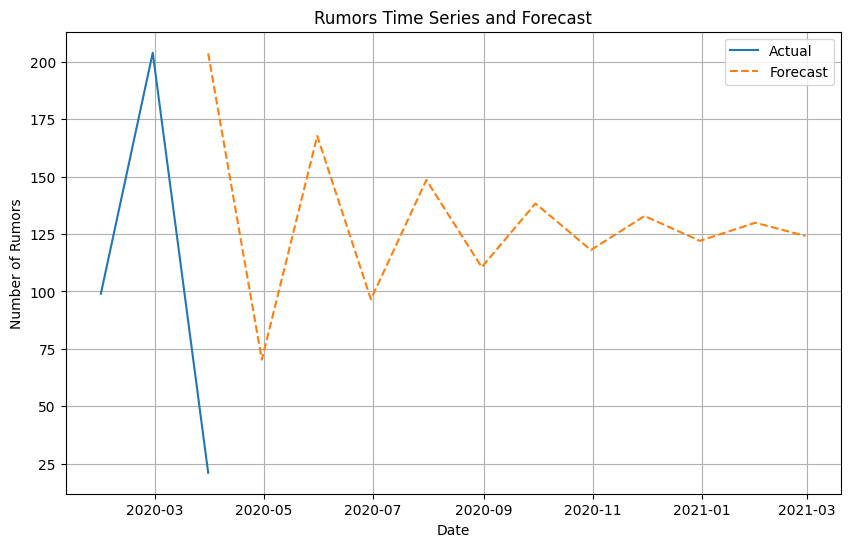

In [22]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 加载数据
weibo_df = pd.read_csv(r'D:\桌面\新冠肺炎分析\weibo_data.csv')

# 提取发布时间作为时间序列索引，假设为日期格式
weibo_df['publishTime'] = pd.to_datetime(weibo_df['publishTime'])
weibo_df.set_index('publishTime', inplace=True)

# 按月份统计谣言数量
rumors_count = weibo_df.resample('M').size()

# 拟合ARIMA模型
model = ARIMA(rumors_count, order=(1, 1, 1))  # 根据实际数据特征调整ARIMA的阶数
model_fit = model.fit()

# 预测未来谣言数量
forecast_steps = 12  # 假设预测未来12个月
forecast = model_fit.forecast(steps=forecast_steps)

# 绘制时间序列及预测结果图
plt.figure(figsize=(10, 6))
plt.plot(rumors_count, label='Actual')
plt.plot(pd.date_range(rumors_count.index[-1], periods=forecast_steps, freq='M'), forecast, label='Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number of Rumors')
plt.title('Rumors Time Series and Forecast')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 加载数据
weibo_df = pd.read_csv('D:\桌面\新冠肺炎分析\weibo_data.csv')

# 文本预处理和向量化
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
rumor_texts = weibo_df['rumorText'].dropna().astype(str).tolist()
X = vectorizer.fit_transform(rumor_texts)

# 主题建模
num_topics = 5  # 设定主题数量
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10, learning_method='online', random_state=42)
lda.fit(X)

# 显示主题关键词
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx+1}:")
    print(", ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()

# 可视化代码可根据具体情况添加


Topic #1:
br, 高速, 国道正常化, 22日重点场所正常化, 25日机场, 动车, 17日公交正常化, 18日逐步企业生产和市场经营正常化, 高三, 大学

Topic #2:
http, cn, target, _blank, noreferrer, noopener, rel, href, feed_list_url, w_ficon

Topic #3:
br, 手机和物品, 不能逗狗了, 带有这种病毒的, 外出时除带口罩外, 狗不生病, 十米之内带口罩没有作用, 此次新型肺炎病毒传播途径是华南海鲜市场进口的豺, 最好还要戴眼镜, 衣服上喷洒精

Topic #4:
ext, e5, type, weibo, class, render, e6, 23, img, href

Topic #5:
同意将该药物专利豁免, 开始在中国临床试验, 吉利德公司的瑞德西韦明日, 经特朗普总统特批, 2月3日, 向中国紧急公开药物分子结构, 目前, 白宫官网消息, 允许中国仿制此药用于治疗冠状病毒患者, 至2020年4月27日



In [2]:
import pandas as pd



# 查看文件的前几行
print("文件的前几行:")
print(df.head())

# 查看文件的基本信息
print("\n文件的基本信息:")
print(df.info())

# 查看文件的统计信息
print("\n文件的统计信息:")
print(df.describe(include='all'))



# 查看文件的前几列数据类型
print("\n数据类型检查:")
print(df.dtypes)

# 查看文件的内存使用情况
print("\n内存使用情况:")
print(df.memory_usage(deep=True))

# 如果需要查看特定列的值
column_name = 'rumorText'  # 请根据您的列名进行修改
if column_name in df.columns:
    print(f"\n查看特定列 ({column_name}) 的前几行:")
    print(df[column_name].head())
else:
    print(f"\n列名 ({column_name}) 不存在于CSV文件中.")


文件的前几行:
       rumorCode                             title  informerName  \
0  K1CaS7gBc6aki                 @花晨悦夕 投诉@火焱G 不实信息          花晨悦夕   
1  K1CaS7Qtk7q0j             @skychos 投诉@论坛说事 不实信息      戒不掉14972   
2  K1CaS7Qtl664i       @用户6559366725 投诉@那一抹绿酱 不实信息  用户6559366725   
3  K1CaS8wxg7q8h               @风fun道 投诉@朱文V评 不实信息         风fun道   
4  K1CaS7Qxg7ack  @xinxingmao 投诉@用户5836796436 不实信息           烦JF   

                     informerUrl rumormongerName  \
0  http://weibo.com/u/5594626915             火焱G   
1  http://weibo.com/u/6550381426            论坛说事   
2  http://weibo.com/u/6559366725           那一抹绿酱   
3  http://weibo.com/u/1810254801            朱文V评   
4  http://weibo.com/u/6254671663    用户5836796436   

                                      rumormongerUrl  \
0  http://weibo.com/1897890352/IvIVYvpRF?from=pag...   
1  http://weibo.com/5897041131/IqYua6QgE?from=pag...   
2  http://weibo.com/5889929900/Ir1IqFAkF?from=pag...   
3  http://weibo.com/1355197100/IvvHMpjMa?from=

In [3]:
# 读取CSV文件
csv_file_path = 'weibo_data.csv'  # 请根据您的文件路径进行修改
df = pd.read_csv(csv_file_path)
# 查看文件的列名
print("\n文件的列名:")
print(df.columns)



文件的列名:
Index(['rumorCode', 'title', 'informerName', 'informerUrl', 'rumormongerName',
       'rumormongerUrl', 'rumorText', 'visitTimes', 'result', 'publishTime',
       'related_url'],
      dtype='object')


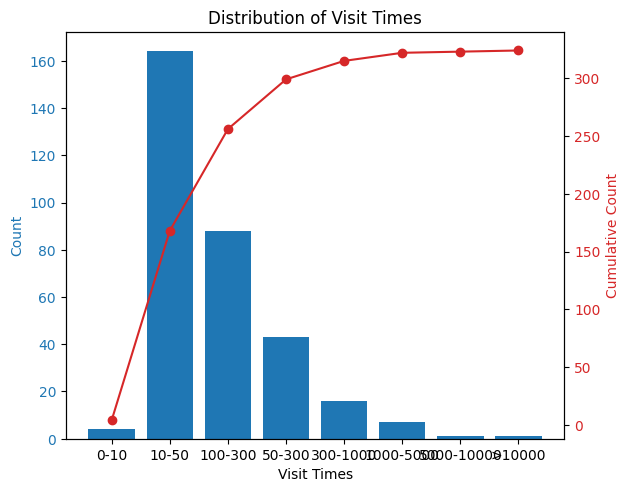

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 weibo_df 已经加载好数据
weibo_df = pd.read_csv('weibo_data.csv')

# 定义访问次数区间
bins = [0, 10, 50, 100,300, 1000, 5000, 10000, float('inf')]
labels = ['0-10', '10-50', '100-300','50-300', '300-1000', '1000-5000', '5000-10000', '>10000']

# 将访问次数分箱
weibo_df['visitTimesBin'] = pd.cut(weibo_df['visitTimes'], bins=bins, labels=labels, right=False)

# 统计每个区间的次数
visit_times_count = weibo_df['visitTimesBin'].value_counts().sort_index()

# 绘制柱状图和折线图
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Visit Times')
ax1.set_ylabel('Count', color=color)
ax1.bar(visit_times_count.index, visit_times_count.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cumulative Count', color=color)
ax2.plot(visit_times_count.index, visit_times_count.cumsum(), color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Distribution of Visit Times')
plt.show()


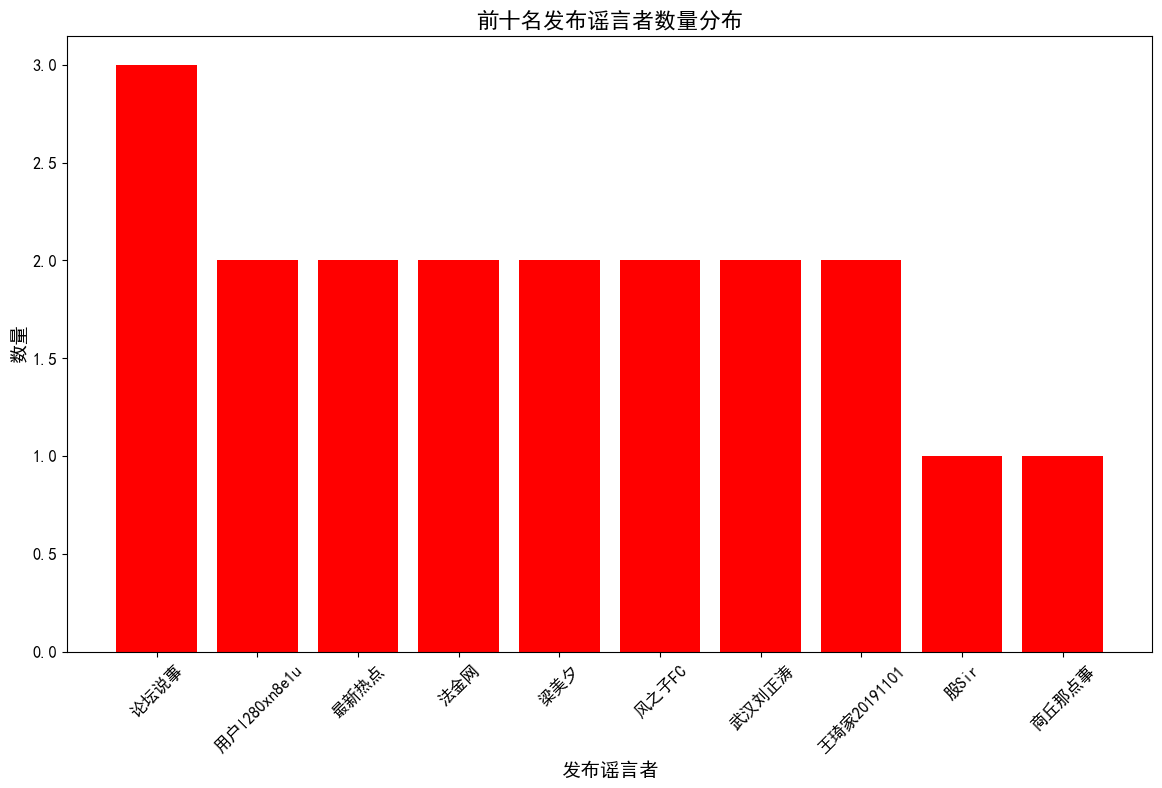

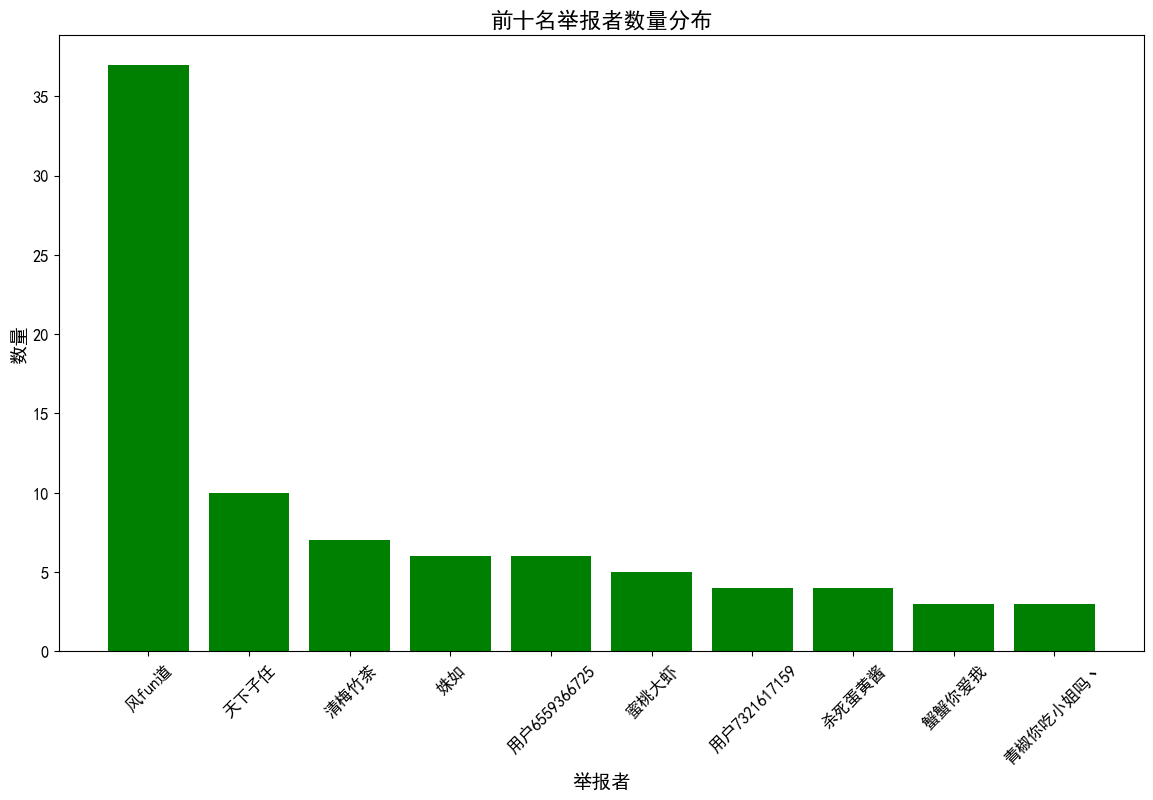

In [16]:


import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 假设 weibo_df 已经加载好数据
weibo_df = pd.read_csv('weibo_data.csv')

# 设置中文字体
font_path = 'C:\Windows\Fonts\simhei.ttf'  # 根据实际路径设置字体路径
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 统计发布谣言者和举报者的数量分布，并选取前十名
rumormonger_count = weibo_df['rumormongerName'].value_counts().head(10)
informer_count = weibo_df['informerName'].value_counts().head(10)

# 增加图像分辨率和图表大小
fig, ax = plt.subplots(figsize=(14, 8), dpi=100)

# 绘制发布谣言者的柱状图
ax.bar(rumormonger_count.index, rumormonger_count.values, color='red')
ax.set_xlabel('发布谣言者', fontsize=14)
ax.set_ylabel('数量', fontsize=14)
ax.set_title('前十名发布谣言者数量分布', fontsize=16)
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12)

plt.show()

# 增加图像分辨率和图表大小
fig, ax = plt.subplots(figsize=(14, 8), dpi=100)

# 绘制举报者的柱状图
ax.bar(informer_count.index, informer_count.values, color='green')
ax.set_xlabel('举报者', fontsize=14)
ax.set_ylabel('数量', fontsize=14)
ax.set_title('前十名举报者数量分布', fontsize=16)
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12)

plt.show()


In [19]:
# 定义一个空的列表来存储每个 JSON 对象
fact_data = []

# 逐行读取 JSON 文件
with open(r'D:\桌面\新冠肺炎分析\rumor\rumor\fact.json', 'r', encoding='utf-8') as f:
    for line in f:
        fact_data.append(json.loads(line.strip()))

# 创建辟谣数据的 DataFrame
fact_df = pd.DataFrame(fact_data)
fact_df = fact_df.dropna(subset=['title'])


NameError: name 'json' is not defined